# DQ Guided Project: Creating Kaggle Workflow for Titanic Data Competition

In this guided project, we are using Kaggle's Titanic Machine Learning From Disaster competition in order to explore a workflow that might make competing in the competition easier, using a pipeline of functions to reduce the number of dimensions.

Data is pulled from Kaggle's website: https://www.kaggle.com/c/titanic/data 

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def new_df(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    cols = ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]
    df = create_dummies(df, cols)
    return df    

In [3]:
train = new_df(train)
holdout = new_df(holdout)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
train.dtypes

In [5]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_Unknown,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,0,0,0,0,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,0,0,0,0,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,0,0,0,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,0,0,0,0,0,0,0,1,1,0


In [6]:
#further examine SibSp and Parch columns
print(train["SibSp"].describe())
print("")
print("unique sibling values:")
print(train["SibSp"].value_counts())
print("")
print("null values: ", train["SibSp"].isnull().sum())

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

unique sibling values:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

null values:  0


In [7]:
print(train["Parch"].describe())
print("")
print("unique parent values:")
print(train["Parch"].value_counts())
print("")
print("null values: ", train["Parch"].isnull().sum())

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

unique parent values:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

null values:  0


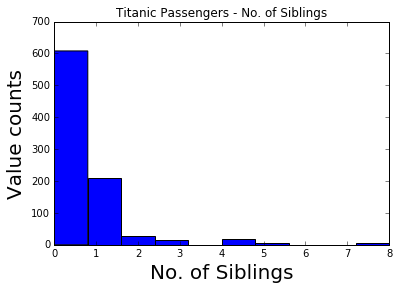

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

siblings = train["SibSp"]
plt.hist(siblings)
plt.title("Titanic Passengers - No. of Siblings")
plt.xlabel("No. of Siblings", fontsize=20)
plt.ylabel("Value counts", fontsize=20)
plt.show()

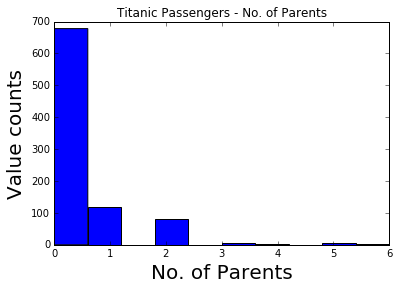

In [9]:
parents = train["Parch"]
plt.hist(parents)
plt.title("Titanic Passengers - No. of Parents")
plt.xlabel("No. of Parents", fontsize=20)
plt.ylabel("Value counts", fontsize=20)
plt.show()

In [10]:
train.groupby("SibSp")[["Survived"]].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train.groupby("Parch")[["Survived"]].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [12]:
train["total_family"] = train["SibSp"] + train["Parch"]
holdout["total_family"] = holdout["SibSp"] + holdout["Parch"]
train.groupby("total_family")[["Survived"]].mean()

,Survived
total_family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# Examining Siblings and Parents of Passengers

By taking a closer look at sibling and parent counts for each passenger in this Titanic dataset, it appears that an overwhelming majority of passengers were aboard the Titanic alone - without family members. An oddity in the parents column showed a very small number of passengers with more than 2 parents. This was most likely a mistake.

The highest survival rate at .72 was for passengers with 3 family members aboard. That means that passengers traveling alone (aka with no family) were less likely to survive than passengers traveling with some sort of family. In fact, only 30% of solo passengers survived.

Based on these initial observations, we can create a new feature: whether the passenger was alone or not (0 = zero family aboard, 1 = one or more family aboard)

In [13]:
def new_feature(df):
    df["isalone"] = np.where((df["total_family"] > 0), 1, 0)
    return df


In [14]:
train = new_feature(train)
holdout = new_feature(holdout)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Survived","PassengerId"],axis=1)
    all_y = df["Survived"]
    rf = RandomForestClassifier(random_state = 1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    optimized_columns = list(all_X.columns[selector.support_])
    return optimized_columns

In [20]:
optimized_cols = select_features(train)
optimized_cols

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Age_categories_Missing',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenager',
 'Age_categories_Young Adult',
 'Age_categories_Adult',
 'Age_categories_Senior',
 'Fare_categories_0-12',
 'Fare_categories_12-50',
 'Fare_categories_50-100',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Cabin_type_A',
 'Cabin_type_B',
 'Cabin_type_C',
 'Cabin_type_D',
 'Cabin_type_E',
 'Cabin_type_Unknown',
 'Sex_female',
 'Sex_male',
 'total_family',
 'isalone']

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, features):
    all_X = df[features]
    all_y = df["Survived"]
    dicts = [{"name": "KNeighborsClassifier",
      "estimator": KNeighborsClassifier(),
      "hyperparameters":
      {"n_neighbors": range(1,20,2),
       "weights": ["distance", "uniform"],
       "algorithm": ["ball_tree", "kd_tree", "brute"],
       "p": [1,2]
      }}, 
     {"name": "LogisticRegression",
     "estimator": LogisticRegression(),
     "hyperparameters":
     {"solver": ["newton-cg", "lbfgs", "liblinear"]
     }},
     {"name": "RandomForestClassifier",
     "estimator": RandomForestClassifier(),
     "hyperparameters":
     {"n_estimators": [4, 6, 9],
     "criterion": ["entropy", "gini"],
     "max_depth": [2, 5, 10],
     "max_features": ["log2", "sqrt"],
     "min_samples_leaf": [1, 5, 8],
     "min_samples_split": [2, 3, 5]
     }}]
    
    for model in dicts:
        print(model["name"])
        grid = GridSearchCV(model["estimator"],param_grid=model["hyperparameters"],cv=10)
        grid.fit(all_X, all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        print("best params: ", model["best_params"])
        print("best score: ", model["best_score"])
        
    return dicts

In [22]:
result = select_model(train, optimized_cols)

KNeighborsClassifier
best params:  {'algorithm': 'kd_tree', 'weights': 'uniform', 'n_neighbors': 3, 'p': 1}
best score:  0.7800224466891134
LogisticRegression
best params:  {'solver': 'newton-cg'}
best score:  0.8204264870931538
RandomForestClassifier
best params:  {'max_depth': 10, 'n_estimators': 9, 'min_samples_split': 5, 'criterion': 'gini', 'min_samples_leaf': 1, 'max_features': 'sqrt'}
best score:  0.8417508417508418


In [25]:
def save_submission_file(model, optimized_cols):
    holdout_data = holdout[optimized_cols]
    predictions = model.predict(holdout_data)
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                    "Survived": predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv("titanic_submission", index=False)

best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model, optimized_cols)

    

# Conclusion

In this project we created a workflow to help iterate over models improve the accuracy of our predictions for the Kaggle competition. 

In the end, our function allowed us to select the highest score of .84 using a RandomForest model.